In [7]:
'''from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import os

data_root = r"C:\Users\sweta\.cache\kagglehub\datasets\qianlanzz\xbd-dataset\versions\1\xbd"
images_path = os.path.join(data_root, "tier1", "images")
masks_path = os.path.join(data_root, "tier1", "masks")

pre_img_file = "guatemala-volcano_00000001_pre_disaster.png"
post_img_file = "guatemala-volcano_00000001_post_disaster.png"
mask_rgb_file = "guatemala-volcano_00000001_post_disaster_rgb.png"

def optical_to_sar_like(img):
    img = img.convert('L') 
    img = ImageOps.autocontrast(img, cutoff=2)
    return img

pre_img = Image.open(os.path.join(images_path, pre_img_file))
post_img = Image.open(os.path.join(images_path, post_img_file))
post_img_sar = optical_to_sar_like(post_img)
mask_rgb = Image.open(os.path.join(masks_path, mask_rgb_file))

def update_mask_binary(mask_rgb_img):
    mask_np = np.array(mask_rgb_img)
    black = [0, 0, 0]
    cyan = [0,255,255]
    
    binary_mask = np.ones((mask_np.shape[0], mask_np.shape[1]), dtype=np.uint8)
    mask_is_black = np.all(mask_np == black, axis=-1)
    mask_is_lime = np.all(mask_np == cyan, axis=-1)
    binary_mask[mask_is_black | mask_is_lime] = 0
    return binary_mask

def update_mask_multiclass(mask_rgb_img): #something is wrong with this,, it works but not propoerly,, perhaps the label color_label things are wrong [MOST LIKELY];; there's yellow??
    mask_np = np.array(mask_rgb_img)
    h, w, _ = mask_np.shape
    label_mask = np.zeros((h, w), dtype=np.uint8)

    color_to_label = {
        (0, 0, 0): 0,                  # black: background
        (0, 255, 255): 0,             # cyan: no damage
        (0,0,255): 1,                 # blue: minor
        (255, 255, 0): 2,           # yellow: major
        (255, 0, 0): 3,            # red: destroyed
        (211, 211, 211): 0            # lightgray: unclassified (will assume no damage)
    }


    for rgb, label in color_to_label.items():
        mask = np.all(mask_np == rgb, axis=-1)
        label_mask[mask] = label

    return label_mask

# Generate masks
binary_mask = update_mask_binary(mask_rgb)
multiclass_mask = update_mask_multiclass(mask_rgb)

import matplotlib.colors as mcolors
damage_colors = ['black', 'blue', 'yellow', 'red']
cmap = mcolors.ListedColormap(damage_colors)
norm = mcolors.BoundaryNorm(boundaries=[-0.5,0.5,1.5,2.5,3.5], ncolors=len(damage_colors))

# Plot all images
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

titles_row1 = ["Pre-Disaster (Optical)", "Post-Disaster (SAR)", "Post-Disaster Mask (RGB)"]
images_row1 = [pre_img, post_img_sar, mask_rgb]

for ax, img, title in zip(axs[0], images_row1, titles_row1):
    if title == "Post-Disaster (SAR)":
        ax.imshow(img, cmap='gray')
    else:
        ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

# Plot binary and multiclass masks on second row
axs[1,0].imshow(binary_mask, cmap='gray')
axs[1,0].set_title("Binary Damage Mask")
axs[1,0].axis('off')

axs[1,1].imshow(multiclass_mask, cmap=cmap, norm=norm)
axs[1,1].set_title("Multiclass Damage Mask")
axs[1,1].axis('off')

# Leave last plot empty or show legend/colorbar
axs[1,2].axis('off')

plt.tight_layout()
plt.show()


#The next step is to start training the models to take in pre-disaster optical image, post-disaster SAR image. The output of the model will be the mutliclass damage mask. The model should be lightweight but still decently good quality.

In the code above , i've only tested one image.. the setup of xbd is
C:\Users\sweta\.cache\kagglehub\datasets\qianlanzz\xbd-dataset\versions\1\xbd
├── hold
│   ├── images
│   │   ├── guatemala-volcano_00000004_post_disaster.png
│   │   ├── guatemala-volcano_00000004_pre_disaster.png
│   │   ├── guatemala-volcano_00000012_post_disaster.png
│   │   ├── guatemala-volcano_00000012_pre_disaster.png
│   │   └── guatemala-volcano_00000014_post_disaster.png
│   │   └── ... and 1861 more files
│   ├── labels
│   │   ├── guatemala-volcano_00000004_post_disaster.json
│   │   ├── guatemala-volcano_00000004_pre_disaster.json
│   │   ├── guatemala-volcano_00000012_post_disaster.json
│   │   ├── guatemala-volcano_00000012_pre_disaster.json
│   │   └── guatemala-volcano_00000014_post_disaster.json
│   │   └── ... and 1861 more files
│   └── masks
│       ├── guatemala-volcano_00000004_post_disaster.png
│       ├── guatemala-volcano_00000004_post_disaster_rgb.png
│       ├── guatemala-volcano_00000004_pre_disaster.png
│       ├── guatemala-volcano_00000012_post_disaster.png
│       └── guatemala-volcano_00000012_post_disaster_rgb.png
│       └── ... and 2794 more files
├── test
│   ├── images
│   │   ├── guatemala-volcano_00000003_post_disaster.png
│   │   ├── guatemala-volcano_00000003_pre_disaster.png
│   │   ├── guatemala-volcano_00000005_post_disaster.png
│   │   ├── guatemala-volcano_00000005_pre_disaster.png
│   │   └── guatemala-volcano_00000009_post_disaster.png
│   │   └── ... and 1861 more files
│   ├── labels
│   │   ├── guatemala-volcano_00000003_post_disaster.json
│   │   ├── guatemala-volcano_00000003_pre_disaster.json
│   │   ├── guatemala-volcano_00000005_post_disaster.json
│   │   ├── guatemala-volcano_00000005_pre_disaster.json
│   │   └── guatemala-volcano_00000009_post_disaster.json
│   │   └── ... and 1861 more files
│   └── masks
│       ├── guatemala-volcano_00000003_post_disaster.png
│       ├── guatemala-volcano_00000003_post_disaster_rgb.png
│       ├── guatemala-volcano_00000003_pre_disaster.png
│       ├── guatemala-volcano_00000005_post_disaster.png
│       └── guatemala-volcano_00000005_post_disaster_rgb.png
│       └── ... and 2794 more files
├── tier1
│   ├── images
│   │   ├── guatemala-volcano_00000000_post_disaster.png
│   │   ├── guatemala-volcano_00000000_pre_disaster.png
│   │   ├── guatemala-volcano_00000001_post_disaster.png
│   │   ├── guatemala-volcano_00000001_pre_disaster.png
│   │   └── guatemala-volcano_00000002_post_disaster.png
│   │   └── ... and 5593 more files
│   ├── labels
│   │   ├── guatemala-volcano_00000000_post_disaster.json
│   │   ├── guatemala-volcano_00000000_pre_disaster.json
│   │   ├── guatemala-volcano_00000001_post_disaster.json
│   │   ├── guatemala-volcano_00000001_pre_disaster.json
│   │   └── guatemala-volcano_00000002_post_disaster.json
│   │   └── ... and 5593 more files
│   └── masks
│       ├── guatemala-volcano_00000000_post_disaster.png
│       ├── guatemala-volcano_00000000_post_disaster_rgb.png
│       ├── guatemala-volcano_00000000_pre_disaster.png
│       ├── guatemala-volcano_00000001_post_disaster.png
│       └── guatemala-volcano_00000001_post_disaster_rgb.png
│       └── ... and 8392 more files
├── tier3
│   ├── images
│   │   ├── joplin-tornado_00000000_post_disaster.png
│   │   ├── joplin-tornado_00000000_pre_disaster.png
│   │   ├── joplin-tornado_00000001_post_disaster.png
│   │   ├── joplin-tornado_00000001_pre_disaster.png
│   │   └── joplin-tornado_00000002_post_disaster.png
│   │   └── ... and 12733 more files
│   ├── labels
│   │   ├── joplin-tornado_00000000_post_disaster.json
│   │   ├── joplin-tornado_00000000_pre_disaster.json
│   │   ├── joplin-tornado_00000001_post_disaster.json
│   │   ├── joplin-tornado_00000001_pre_disaster.json
│   │   └── joplin-tornado_00000002_post_disaster.json
│   │   └── ... and 12733 more files
│   └── masks
│       ├── joplin-tornado_00000000_post_disaster.png
│       ├── joplin-tornado_00000000_post_disaster_rgb.png
│       ├── joplin-tornado_00000000_pre_disaster.png
│       ├── joplin-tornado_00000001_post_disaster.png
│       └── joplin-tornado_00000001_post_disaster_rgb.png
│       └── ... and 19102 more files
└── train
    └── images
        ├── hurricane-harvey_00000000_post_disaster.png
        ├── hurricane-harvey_00000000_pre_disaster.png
        ├── hurricane-harvey_00000001_post_disaster.png
        ├── hurricane-harvey_00000001_pre_disaster.png
        └── hurricane-harvey_00000002_post_disaster.png
        └── ... and 5 more files
'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 110-111: truncated \UXXXXXXXX escape (2160016801.py, line 1)

Input shape: torch.Size([4, 256, 256])
Target shape: torch.Size([256, 256])
Unique labels in target: tensor([0, 2])


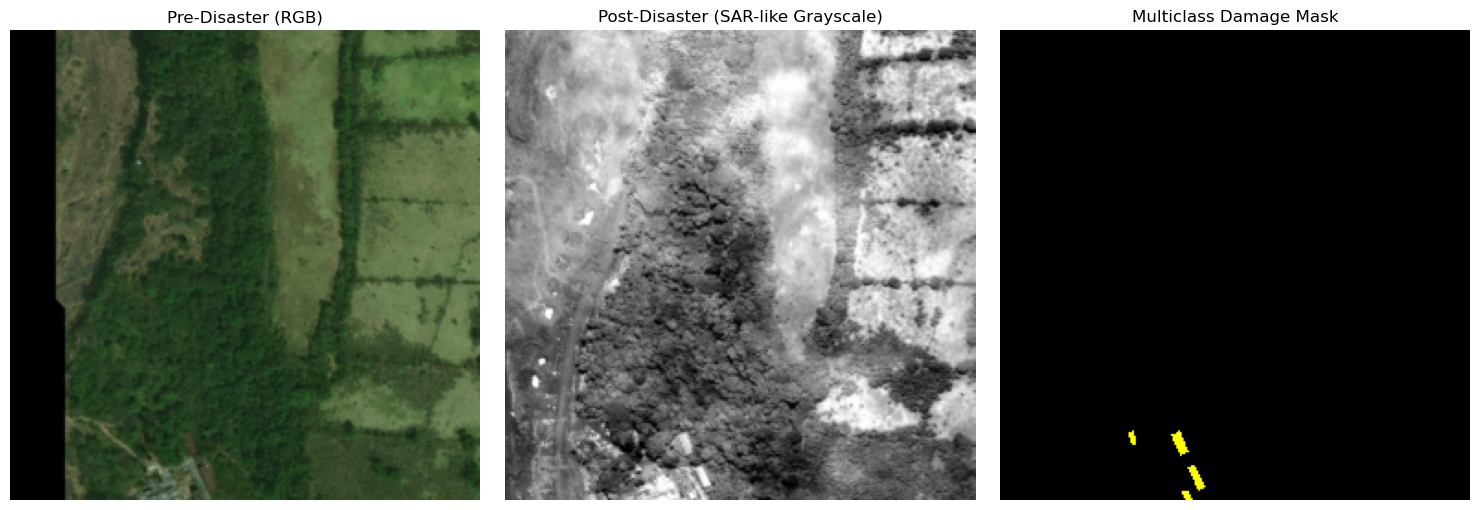

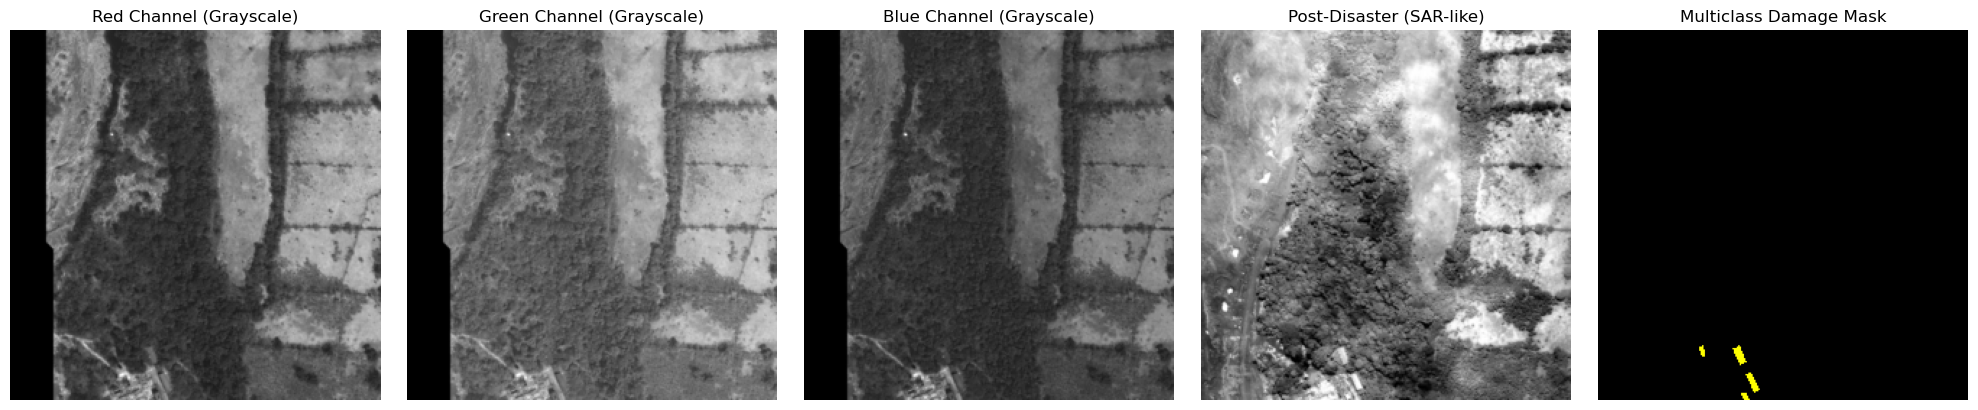

In [3]:
import os
import torch
from torch.utils.data import Dataset
from torchvision import transforms as T
from PIL import Image, ImageOps
import numpy as np

def optical_to_sar_like(img):
    img = img.convert('L')
    img = ImageOps.autocontrast(img, cutoff=2)
    return img

def update_mask_multiclass(mask_rgb_img):
    mask_np = np.array(mask_rgb_img)
    h, w, _ = mask_np.shape
    label_mask = np.zeros((h, w), dtype=np.uint8)

    color_to_label = {
        (0, 0, 0): 0,              # background
        (0, 255, 255): 0,          # cyan: no damage
        (0, 0, 255): 1,            # blue: minor
        (255, 255, 0): 2,          # yellow: major
        (255, 0, 0): 3,            # red: destroyed
        (211, 211, 211): 0         # lightgray: unclassified → no damage
    }

    for rgb, label in color_to_label.items():
        mask = np.all(mask_np == rgb, axis=-1)
        label_mask[mask] = label

    return label_mask

def resize_mask(mask_np, size=(256, 256)):
    """
    Resize a numpy mask (H,W) to `size` using nearest neighbor interpolation.
    """
    mask_pil = Image.fromarray(mask_np)
    mask_resized = mask_pil.resize(size, resample=Image.NEAREST)
    return np.array(mask_resized)

class XBDMulticlassDataset(Dataset):
    def __init__(self, root_dir, transform_img=None, resize_mask_to=(256,256)):
        self.image_dir = os.path.join(root_dir, "images")
        self.mask_dir = os.path.join(root_dir, "masks")
        self.files = sorted([f for f in os.listdir(self.image_dir) if '_pre_disaster.png' in f])
        self.transform_img = transform_img
        self.resize_mask_to = resize_mask_to

    def __getitem__(self, idx):
        pre_file = self.files[idx]
        post_file = pre_file.replace('pre', 'post')
        mask_file = post_file.replace('.png', '_rgb.png')

        # Load images
        pre_img = Image.open(os.path.join(self.image_dir, pre_file)).convert("RGB")
        post_img_rgb = Image.open(os.path.join(self.image_dir, post_file)).convert("RGB")
        mask_img = Image.open(os.path.join(self.mask_dir, mask_file)).convert("RGB")

        # Convert post image to SAR-like grayscale
        post_img_sar = optical_to_sar_like(post_img_rgb)  # PIL grayscale

        # Apply transforms to images
        if self.transform_img:
            pre_img = self.transform_img(pre_img)           # (3, H, W)
            post_img_sar = self.transform_img(post_img_sar) # (1, H, W)

        # Process and resize mask
        mask_np = update_mask_multiclass(mask_img)          # (H_orig, W_orig)
        if self.resize_mask_to is not None:
            mask_np_resized = resize_mask(mask_np, self.resize_mask_to)  # (H_new, W_new)
        mask_tensor = torch.tensor(mask_np_resized, dtype=torch.long)

        # Stack pre and post images channel-wise: (4, H, W)
        input_tensor = torch.cat([pre_img, post_img_sar], dim=0)

        return input_tensor, mask_tensor

    def __len__(self):
        return len(self.files)


# Example usage:

if __name__ == "__main__":
    img_transform = T.Compose([
        T.Resize((256, 256)),
        T.ToTensor()
    ])

    data_root = r"C:\Users\sweta\.cache\kagglehub\datasets\qianlanzz\xbd-dataset\versions\1\xbd\tier1"
    dataset = XBDMulticlassDataset(data_root, transform_img=img_transform)

    input_tensor, target_mask = dataset[1]
    print(f"Input shape: {input_tensor.shape}")   # Expect (4, 256, 256)
    print(f"Target shape: {target_mask.shape}")   # Expect (256, 256)
    print(f"Unique labels in target: {torch.unique(target_mask)}")

import matplotlib.pyplot as plt

# Extract and reshape for display
pre_img_np = input_tensor[:3].permute(1, 2, 0).numpy()   # (H, W, 3) -> pre-disaster RGB
sar_img_np = input_tensor[3].numpy()                    # (H, W)    -> post-disaster SAR-like
mask_np = target_mask.numpy()                           # (H, W)    -> multiclass labels

# Plot them
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(pre_img_np)
axs[0].set_title("Pre-Disaster (RGB)")
axs[0].axis("off")

axs[1].imshow(sar_img_np, cmap='gray')
axs[1].set_title("Post-Disaster (SAR-like Grayscale)")
axs[1].axis("off")

# Use a color map to show different damage categories
import matplotlib.colors as mcolors
damage_colors = ['black', 'blue', 'yellow', 'red']
cmap = mcolors.ListedColormap(damage_colors)
norm = mcolors.BoundaryNorm(boundaries=[-0.5, 0.5, 1.5, 2.5, 3.5], ncolors=len(damage_colors))

axs[2].imshow(mask_np, cmap=cmap, norm=norm)
axs[2].set_title("Multiclass Damage Mask")
axs[2].axis("off")

plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Extract individual channels from input tensor
r_channel = input_tensor[0].numpy()  # (H, W)
g_channel = input_tensor[1].numpy()  # (H, W)
b_channel = input_tensor[2].numpy()  # (H, W)
sar_img_np = input_tensor[3].numpy() # (H, W)
mask_np = target_mask.numpy()        # (H, W)

# Color map for the mask
damage_colors = ['black', 'blue', 'yellow', 'red']
cmap = mcolors.ListedColormap(damage_colors)
norm = mcolors.BoundaryNorm(boundaries=[-0.5, 0.5, 1.5, 2.5, 3.5], ncolors=len(damage_colors))

# Plot
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

axs[0].imshow(r_channel, cmap='gray')
axs[0].set_title("Red Channel (Grayscale)")
axs[0].axis("off")

axs[1].imshow(g_channel, cmap='gray')
axs[1].set_title("Green Channel (Grayscale)")
axs[1].axis("off")

axs[2].imshow(b_channel, cmap='gray')
axs[2].set_title("Blue Channel (Grayscale)")
axs[2].axis("off")

axs[3].imshow(sar_img_np, cmap='gray')
axs[3].set_title("Post-Disaster (SAR-like)")
axs[3].axis("off")

axs[4].imshow(mask_np, cmap=cmap, norm=norm)
axs[4].set_title("Multiclass Damage Mask")
axs[4].axis("off")

plt.tight_layout()
plt.show()


Input shape: torch.Size([4, 256, 256])
Target shape: torch.Size([256, 256])
Unique labels in target: tensor([0, 2])
Number of tiles: 16
One tile input shape: torch.Size([4, 64, 64])
One tile mask shape: torch.Size([64, 64])


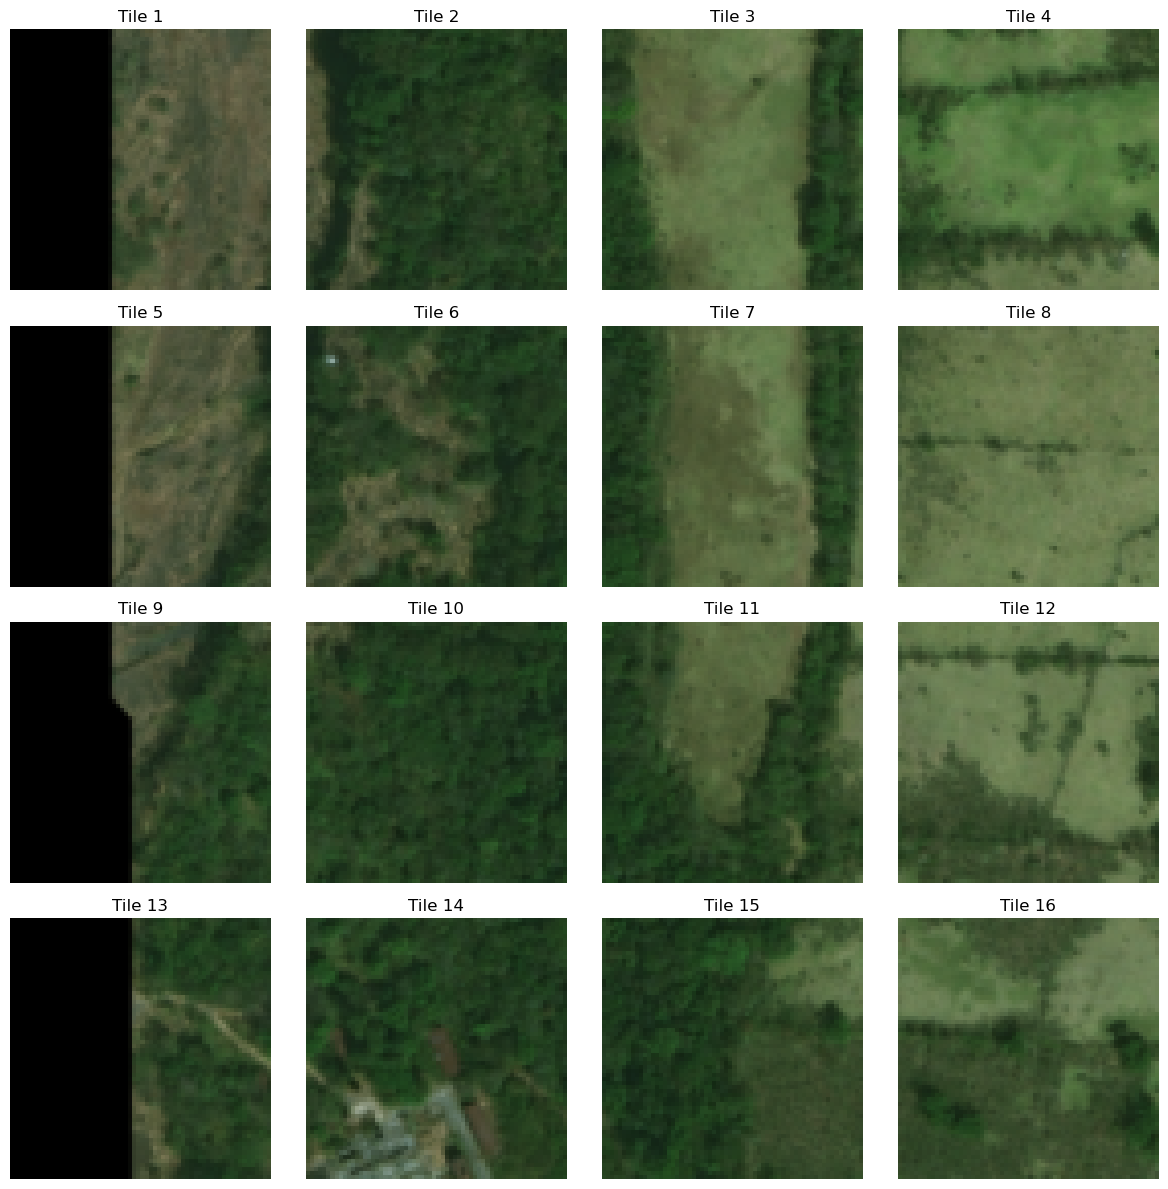

In [5]:
import os
import torch
from torch.utils.data import Dataset
from torchvision import transforms as T
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def optical_to_sar_like(img):
    img = img.convert('L')
    img = ImageOps.autocontrast(img, cutoff=2)
    return img

def update_mask_multiclass(mask_rgb_img):
    mask_np = np.array(mask_rgb_img)
    h, w, _ = mask_np.shape
    label_mask = np.zeros((h, w), dtype=np.uint8)

    color_to_label = {
        (0, 0, 0): 0,              # background
        (0, 255, 255): 0,          # cyan: no damage
        (0, 0, 255): 1,            # blue: minor
        (255, 255, 0): 2,          # yellow: major
        (255, 0, 0): 3,            # red: destroyed
        (211, 211, 211): 0         # lightgray: unclassified → no damage
    }

    for rgb, label in color_to_label.items():
        mask = np.all(mask_np == rgb, axis=-1)
        label_mask[mask] = label

    return label_mask

def resize_mask(mask_np, size=(256, 256)):
    mask_pil = Image.fromarray(mask_np)
    mask_resized = mask_pil.resize(size, resample=Image.NEAREST)
    return np.array(mask_resized)

def tile_tensor_and_mask(input_tensor, mask_tensor, tile_size=(64, 64)):
    """
    Splits input tensor (C,H,W) and mask tensor (H,W) into 4x4 tiles.
    Returns lists of tiles.
    """
    C, H, W = input_tensor.shape
    tile_H, tile_W = tile_size
    tiles_input = []
    tiles_mask = []

    for i in range(0, H, tile_H):
        for j in range(0, W, tile_W):
            input_tile = input_tensor[:, i:i+tile_H, j:j+tile_W]
            mask_tile = mask_tensor[i:i+tile_H, j:j+tile_W]
            tiles_input.append(input_tile)
            tiles_mask.append(mask_tile)

    return tiles_input, tiles_mask

class XBDMulticlassDataset(Dataset):
    def __init__(self, root_dir, transform_img=None, resize_mask_to=(256,256)):
        self.image_dir = os.path.join(root_dir, "images")
        self.mask_dir = os.path.join(root_dir, "masks")
        self.files = sorted([f for f in os.listdir(self.image_dir) if '_pre_disaster.png' in f])
        self.transform_img = transform_img
        self.resize_mask_to = resize_mask_to

    def __getitem__(self, idx):
        pre_file = self.files[idx]
        post_file = pre_file.replace('pre', 'post')
        mask_file = post_file.replace('.png', '_rgb.png')

        # Load images
        pre_img = Image.open(os.path.join(self.image_dir, pre_file)).convert("RGB")
        post_img_rgb = Image.open(os.path.join(self.image_dir, post_file)).convert("RGB")
        mask_img = Image.open(os.path.join(self.mask_dir, mask_file)).convert("RGB")

        # Convert post image to SAR-like grayscale
        post_img_sar = optical_to_sar_like(post_img_rgb)

        # Apply transforms to images
        if self.transform_img:
            pre_img = self.transform_img(pre_img)             # (3, H, W)
            post_img_sar = self.transform_img(post_img_sar)   # (1, H, W)

        # Process and resize mask
        mask_np = update_mask_multiclass(mask_img)
        mask_np_resized = resize_mask(mask_np, self.resize_mask_to)
        mask_tensor = torch.tensor(mask_np_resized, dtype=torch.long)

        # Stack pre and post images channel-wise: (4, H, W)
        input_tensor = torch.cat([pre_img, post_img_sar], dim=0)

        return input_tensor, mask_tensor

    def __len__(self):
        return len(self.files)


# Example usage:
if __name__ == "__main__":
    img_transform = T.Compose([
        T.Resize((256, 256)),
        T.ToTensor()
    ])

    data_root = r"C:\Users\sweta\.cache\kagglehub\datasets\qianlanzz\xbd-dataset\versions\1\xbd\tier1"
    dataset = XBDMulticlassDataset(data_root, transform_img=img_transform)

    input_tensor, target_mask = dataset[1]
    print(f"Input shape: {input_tensor.shape}")   # (4, 256, 256)
    print(f"Target shape: {target_mask.shape}")   # (256, 256)
    print(f"Unique labels in target: {torch.unique(target_mask)}")

    # Split into 4x4 tiles of 64x64
    tiles_input, tiles_mask = tile_tensor_and_mask(input_tensor, target_mask, tile_size=(64,64))

    print(f"Number of tiles: {len(tiles_input)}")  # Expect 16
    print(f"One tile input shape: {tiles_input[0].shape}")  # (4, 64, 64)
    print(f"One tile mask shape: {tiles_mask[0].shape}")    # (64, 64)

    # Optional: visualize some tiles
    fig, axs = plt.subplots(4, 4, figsize=(12, 12))
    for idx, ax in enumerate(axs.flatten()):
        tile_rgb = tiles_input[idx][:3].permute(1, 2, 0).numpy()  # RGB channels only
        ax.imshow(tile_rgb)
        ax.axis('off')
        ax.set_title(f'Tile {idx+1}')
    plt.tight_layout()
    plt.show()


Dataset initialized with 2799 images
Image size: (1024, 1024), Tile size: (256, 256)
Expected tiles per image: 16
Index 0: No damage found in any tile, skipping visualization.


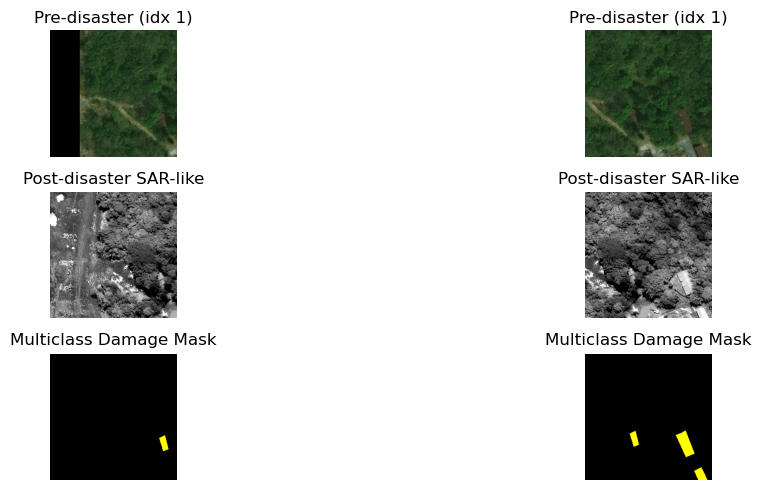

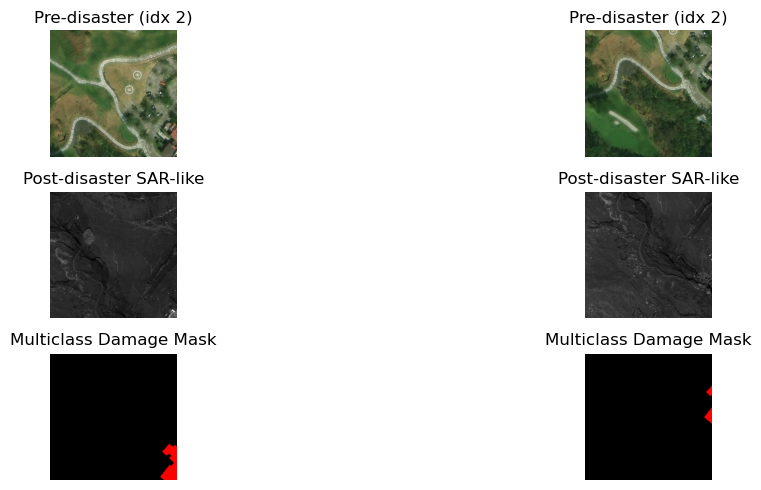

Index 3: No damage found in any tile, skipping visualization.
Index 4: No damage found in any tile, skipping visualization.
Index 5: No damage found in any tile, skipping visualization.
Index 6: No damage found in any tile, skipping visualization.
Index 7: No damage found in any tile, skipping visualization.
Index 8: No damage found in any tile, skipping visualization.


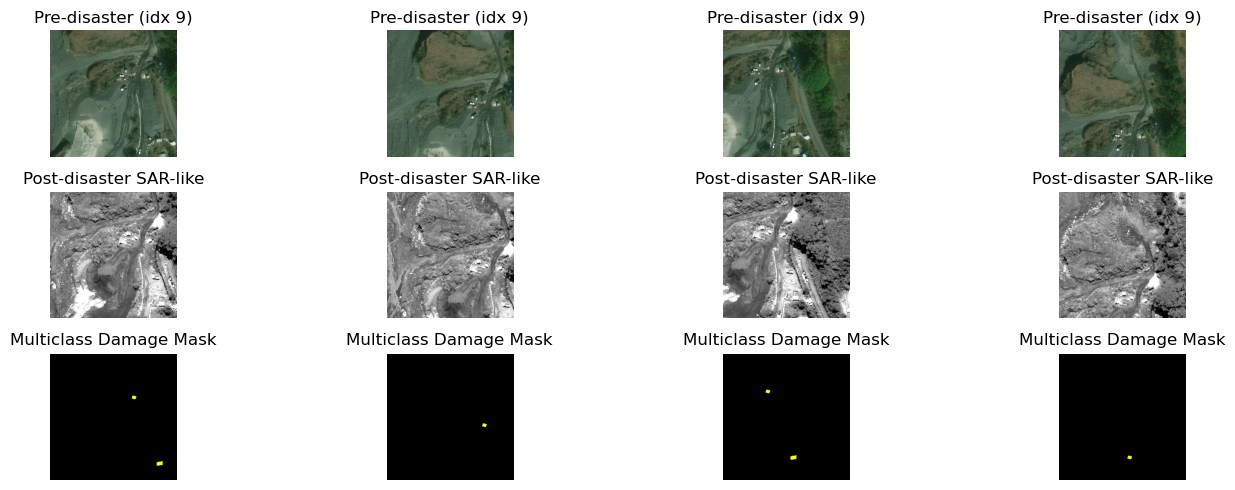

In [6]:
import os
import torch
from torch.utils.data import Dataset
from torchvision import transforms as T
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List, Optional
import matplotlib.colors as mcolors

def optical_to_sar_like(img: Image.Image) -> Image.Image:
    """Convert optical image to SAR-like grayscale representation."""
    img = img.convert('L')
    img = ImageOps.autocontrast(img, cutoff=2)
    return img

def update_mask_multiclass(mask_rgb_img: Image.Image) -> np.ndarray:
    """Convert RGB mask to multiclass label mask."""
    mask_np = np.array(mask_rgb_img)
    h, w, _ = mask_np.shape
    label_mask = np.zeros((h, w), dtype=np.uint8)

    color_to_label = {
        (0, 0, 0): 0,              # background
        (0, 255, 255): 0,          # cyan: no damage
        (0, 0, 255): 1,            # blue: minor
        (255, 255, 0): 2,          # yellow: major
        (255, 0, 0): 3,            # red: destroyed
        (211, 211, 211): 0         # lightgray: unclassified → no damage
    }

    for rgb, label in color_to_label.items():
        mask = np.all(mask_np == rgb, axis=-1)
        label_mask[mask] = label

    return label_mask

def tile_tensor_and_mask(input_tensor: torch.Tensor, mask_tensor: torch.Tensor, 
                         tile_size: Tuple[int, int] = (256, 256)) -> Tuple[List[torch.Tensor], List[torch.Tensor]]:
    """
    Splits input tensor (C,H,W) and mask tensor (H,W) into tiles.
    """
    C, H, W = input_tensor.shape
    tile_H, tile_W = tile_size
    tiles_input = []
    tiles_mask = []

    assert H % tile_H == 0 and W % tile_W == 0, f"Image size ({H}, {W}) not divisible by tile size ({tile_H}, {tile_W})"
    
    for i in range(0, H, tile_H):
        for j in range(0, W, tile_W):
            input_tile = input_tensor[:, i:i+tile_H, j:j+tile_W]
            mask_tile = mask_tensor[i:i+tile_H, j:j+tile_W]
            tiles_input.append(input_tile)
            tiles_mask.append(mask_tile)

    return tiles_input, tiles_mask

class XBDMulticlassDataset(Dataset):
    def __init__(self, root_dir: str, 
                 transform_pre: Optional[T.Compose] = None, 
                 transform_post: Optional[T.Compose] = None,
                 image_size: Tuple[int, int] = (1024, 1024), 
                 tile_size: Tuple[int, int] = (256, 256)):
        """
        XBD Dataset for multiclass damage assessment with tiling support.
        """
        self.image_dir = os.path.join(root_dir, "images")
        self.mask_dir = os.path.join(root_dir, "masks")
        
        assert os.path.exists(self.image_dir), f"Image directory not found: {self.image_dir}"
        assert os.path.exists(self.mask_dir), f"Mask directory not found: {self.mask_dir}"
        
        self.files = sorted([f for f in os.listdir(self.image_dir) if '_pre_disaster.png' in f])
        self.transform_pre = transform_pre
        self.transform_post = transform_post
        self.image_size = image_size
        self.tile_size = tile_size
        
        self.tiles_per_image = (image_size[0] // tile_size[0]) * (image_size[1] // tile_size[1])
        
        print(f"Dataset initialized with {len(self.files)} images")
        print(f"Image size: {image_size}, Tile size: {tile_size}")
        print(f"Expected tiles per image: {self.tiles_per_image}")

    def __getitem__(self, idx: int, return_raw: bool = False):
        pre_file = self.files[idx]
        post_file = pre_file.replace('pre', 'post')
        mask_file = post_file.replace('.png', '_rgb.png')

        pre_path = os.path.join(self.image_dir, pre_file)
        post_path = os.path.join(self.image_dir, post_file)
        mask_path = os.path.join(self.mask_dir, mask_file)
        
        assert os.path.exists(pre_path), f"Pre image not found: {pre_path}"
        assert os.path.exists(post_path), f"Post image not found: {post_path}"
        assert os.path.exists(mask_path), f"Mask not found: {mask_path}"

        # Load and resize raw PIL images (no color space or normalization change here)
        pre_img_raw = Image.open(pre_path).convert("RGB").resize(self.image_size, Image.LANCZOS)
        post_img_rgb_raw = Image.open(post_path).convert("RGB").resize(self.image_size, Image.LANCZOS)
        mask_img_raw = Image.open(mask_path).convert("RGB").resize(self.image_size, Image.NEAREST)

        post_img_sar_raw = optical_to_sar_like(post_img_rgb_raw)

        if return_raw:
            # Return raw images and multiclass mask array for visualization
            mask_np = update_mask_multiclass(mask_img_raw)
            return pre_img_raw, post_img_sar_raw, mask_np

        # Otherwise return processed tensors for training
        pre_img = pre_img_raw
        post_img_sar = post_img_sar_raw

        if self.transform_pre:
            pre_img = self.transform_pre(pre_img)
        if self.transform_post:
            post_img_sar = self.transform_post(post_img_sar)

        mask_np = update_mask_multiclass(mask_img_raw)
        mask_tensor = torch.tensor(mask_np, dtype=torch.long)

        input_tensor = torch.cat([pre_img, post_img_sar], dim=0)

        tiles_input, tiles_mask = tile_tensor_and_mask(input_tensor, mask_tensor, self.tile_size)

        return tiles_input, tiles_mask

    def __len__(self) -> int:
        return len(self.files)
    
    def get_tile_dataset(self):
        return TiledXBDDataset(self)

class TiledXBDDataset(Dataset):
    def __init__(self, parent_dataset: XBDMulticlassDataset):
        self.parent_dataset = parent_dataset
        self.tiles_per_image = parent_dataset.tiles_per_image
        
    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, torch.Tensor]:
        image_idx = idx // self.tiles_per_image
        tile_idx = idx % self.tiles_per_image
        
        tiles_input, tiles_mask = self.parent_dataset[image_idx]
        return tiles_input[tile_idx], tiles_mask[tile_idx]
    
    def __len__(self) -> int:
        return len(self.parent_dataset) * self.tiles_per_image

def visualize_raw_images_and_masks(
    dataset: XBDMulticlassDataset,
    indices: List[int],
    num_tiles_to_show: int = 4,
    tile_size: Tuple[int, int] = (256, 256),
    figsize: Tuple[int,int] = (15, 5),
    max_samples_with_damage: int = 5
):
    """
    Visualize raw pre-disaster RGB, post-disaster SAR-like, and multiclass damage mask tiles side by side.
    Keeps searching through indices until it finds samples with damage for visualization.
    """
    cmap = mcolors.ListedColormap(['black', 'blue', 'yellow', 'red'])
    bounds = [0,1,2,3,4]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    samples_visualized = 0

    for idx in indices:
        pre_img, post_sar_img, multiclass_mask = dataset.__getitem__(idx, return_raw=True)

        h, w = multiclass_mask.shape
        th, tw = tile_size

        found_tile_with_damage = False
        valid_tiles = []

        attempts = 0
        max_attempts = 50  # avoid infinite loops

        while len(valid_tiles) < num_tiles_to_show and attempts < max_attempts:
            top = np.random.randint(0, h - th + 1)
            left = np.random.randint(0, w - tw + 1)
            mask_crop = multiclass_mask[top:top+th, left:left+tw]

            if np.any(mask_crop > 0):
                found_tile_with_damage = True
                pre_crop = pre_img.crop((left, top, left + tw, top + th))
                post_crop = post_sar_img.crop((left, top, left + tw, top + th))
                valid_tiles.append((pre_crop, post_crop, mask_crop))

            attempts += 1

        if not found_tile_with_damage:
            print(f"Index {idx}: No damage found in any tile, skipping visualization.")
            continue

        fig, axes = plt.subplots(3, len(valid_tiles), figsize=(figsize[0], figsize[1]))
        # If only one tile, axes is 1D with length 3; reshape for consistent 2D indexing
        if len(valid_tiles) == 1:
            axes = axes.reshape(3, 1)
        for i, (pre_crop, post_crop, mask_crop) in enumerate(valid_tiles):
            axes[0, i].imshow(pre_crop)
            axes[0, i].set_title(f'Pre-disaster (idx {idx})')
            axes[0, i].axis('off')

            axes[1, i].imshow(post_crop, cmap='gray')
            axes[1, i].set_title('Post-disaster SAR-like')
            axes[1, i].axis('off')

            axes[2, i].imshow(mask_crop, cmap=cmap, norm=norm)
            axes[2, i].set_title('Multiclass Damage Mask')
            axes[2, i].axis('off')

        plt.tight_layout()
        plt.show()

        samples_visualized += 1
        if samples_visualized >= max_samples_with_damage:
            print(f"Visualized {samples_visualized} samples with damage, stopping.")
            break


# Example usage
if __name__ == "__main__":
    transform_pre = T.Compose([
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    transform_post = T.Compose([
        T.ToTensor(),
        T.Normalize(mean=[0.5], std=[0.5])  # Normalize grayscale SAR-like image
    ])

    data_root = r"C:\Users\sweta\.cache\kagglehub\datasets\qianlanzz\xbd-dataset\versions\1\xbd\tier1"

    dataset = XBDMulticlassDataset(
        data_root, 
        transform_pre=transform_pre, 
        transform_post=transform_post,
        image_size=(1024, 1024),
        tile_size=(256, 256)
    )

    # Visualize raw images and masks for first 10 samples, showing up to 5 samples with damage
    indices_to_visualize = list(range(10))
    visualize_raw_images_and_masks(dataset, indices_to_visualize, num_tiles_to_show=4)

In [ ]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from torchvision import transforms as T
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import random

# XBDMulticlassDataset, TiledXBDDataset, FilteredTileDataset, UNet are already defined

# ============================
# 1. Modify Dataset
# ============================
class XBDMulticlassDataset(Dataset):
    def __init__(self, root_dir, transform_pre=None, transform_post=None,
                 image_size=(1024, 1024), tile_size=(256, 256), max_images=None):
        self.image_dir = os.path.join(root_dir, "images")
        self.mask_dir = os.path.join(root_dir, "masks")

        all_files = sorted([f for f in os.listdir(self.image_dir) if '_pre_disaster.png' in f])
        self.files = all_files[:max_images] if max_images else all_files

        self.transform_pre = transform_pre
        self.transform_post = transform_post
        self.image_size = image_size
        self.tile_size = tile_size
        self.tiles_per_image = (image_size[0] // tile_size[0]) * (image_size[1] // tile_size[1])

    def __getitem__(self, idx, return_raw=False):
        pre_file = self.files[idx]
        post_file = pre_file.replace('pre', 'post')
        mask_file = post_file.replace('.png', '_rgb.png')

        pre_path = os.path.join(self.image_dir, pre_file)
        post_path = os.path.join(self.image_dir, post_file)
        mask_path = os.path.join(self.mask_dir, mask_file)

        from PIL import Image, ImageOps

        def optical_to_sar_like(img):
            img = img.convert('L')
            img = ImageOps.autocontrast(img, cutoff=2)
            return img

        def update_mask_multiclass(mask_rgb_img):
            mask_np = np.array(mask_rgb_img)
            label_mask = np.zeros(mask_np.shape[:2], dtype=np.uint8)
            color_to_label = {
                (0, 0, 0): 0, (0, 255, 255): 0, (0, 0, 255): 1,
                (255, 255, 0): 2, (255, 0, 0): 3, (211, 211, 211): 0
            }
            for rgb, label in color_to_label.items():
                mask = np.all(mask_np == rgb, axis=-1)
                label_mask[mask] = label
            return label_mask

        pre_img_raw = Image.open(pre_path).convert("RGB").resize(self.image_size)
        post_img_raw = Image.open(post_path).convert("RGB").resize(self.image_size)
        mask_img_raw = Image.open(mask_path).convert("RGB").resize(self.image_size, Image.NEAREST)
        post_img_sar_raw = optical_to_sar_like(post_img_raw)

        if return_raw:
            mask_np = update_mask_multiclass(mask_img_raw)
            return pre_img_raw, post_img_sar_raw, mask_np

        if self.transform_pre:
            pre_img = self.transform_pre(pre_img_raw)
        if self.transform_post:
            post_img_sar = self.transform_post(post_img_sar_raw)

        input_tensor = torch.cat([pre_img, post_img_sar], dim=0)
        mask_tensor = torch.tensor(update_mask_multiclass(mask_img_raw), dtype=torch.long)

        return tile_tensor_and_mask(input_tensor, mask_tensor, self.tile_size)

    def __len__(self):
        return len(self.files)

    def get_tile_dataset(self):
        return TiledXBDDataset(self)


def tile_tensor_and_mask(input_tensor, mask_tensor, tile_size=(256, 256)):
    C, H, W = input_tensor.shape
    th, tw = tile_size
    tiles_input = []
    tiles_mask = []
    for i in range(0, H, th):
        for j in range(0, W, tw):
            tiles_input.append(input_tensor[:, i:i+th, j:j+tw])
            tiles_mask.append(mask_tensor[i:i+th, j:j+tw])
    return tiles_input, tiles_mask


class TiledXBDDataset(Dataset):
    def __init__(self, parent_dataset):
        self.parent_dataset = parent_dataset
        self.tiles_per_image = parent_dataset.tiles_per_image

    def __getitem__(self, idx):
        image_idx = idx // self.tiles_per_image
        tile_idx = idx % self.tiles_per_image
        tiles_input, tiles_mask = self.parent_dataset[image_idx]
        return tiles_input[tile_idx], tiles_mask[tile_idx]

    def __len__(self):
        return len(self.parent_dataset) * self.tiles_per_image


class FilteredTileDataset(Dataset):
    def __init__(self, tiled_dataset, keep_zero_damage_prob=0.1):
        self.tiled_dataset = tiled_dataset
        self.filtered_indices = []
        for idx in range(len(tiled_dataset)):
            _, mask = tiled_dataset[idx]
            if mask.max() == 0:
                if random.random() < keep_zero_damage_prob:
                    self.filtered_indices.append(idx)
            else:
                self.filtered_indices.append(idx)

    def __len__(self):
        return len(self.filtered_indices)

    def __getitem__(self, idx):
        real_idx = self.filtered_indices[idx]
        return self.tiled_dataset[real_idx]


# ============================
# 2. Visualization Function
# ============================
def unnormalize(img_tensor, mean, std):
    """
    Reverse normalization on a tensor image.
    img_tensor: [3, H, W] or [1, H, W]
    mean and std should be lists of the same length as channels.
    """
    for t, m, s in zip(img_tensor, mean, std):
        t.mul_(s).add_(m)
    return img_tensor

def visualize_predictions(inputs, masks, outputs, n=4):
    preds = torch.argmax(outputs, dim=1).cpu().numpy()
    masks = masks.cpu().numpy()

    cmap = mcolors.ListedColormap(['black', 'blue', 'yellow', 'red'])
    bounds = [0, 1, 2, 3, 4]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    for i in range(min(n, inputs.shape[0])):
        fig, axs = plt.subplots(1, 3, figsize=(12, 4))
        pre_rgb = unnormalize(inputs[i][:3].clone(), [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        pre_rgb = torch.clamp(pre_rgb, 0, 1)  # Ensure safe for imshow
        axs[0].imshow(np.transpose(pre_rgb.cpu().numpy(), (1, 2, 0)))

        axs[0].set_title("Pre-disaster RGB")
        axs[0].axis('off')

        axs[1].imshow(inputs[i][3].cpu().numpy(), cmap='gray')
        axs[1].set_title("Post-disaster SAR")
        axs[1].axis('off')

        axs[2].imshow(preds[i], cmap=cmap, norm=norm)
        axs[2].set_title("Predicted")
        axs[2].axis('off')

        plt.show()

        plt.figure(figsize=(4, 4))
        plt.imshow(masks[i], cmap=cmap, norm=norm)
        plt.title("Ground Truth")
        plt.axis('off')
        plt.show()


# ============================
# 3. Training Setup
# ============================
transform_pre = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
transform_post = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.5], std=[0.5])
])

data_root = r"C:\Users\sweta\.cache\kagglehub\datasets\qianlanzz\xbd-dataset\versions\1\xbd\tier1"

dataset = XBDMulticlassDataset(
    data_root,
    transform_pre=transform_pre,
    transform_post=transform_post,
    image_size=(1024, 1024),
    tile_size=(256, 256),
)

tiled_dataset = dataset.get_tile_dataset()
filtered_dataset = FilteredTileDataset(tiled_dataset, keep_zero_damage_prob=0.1)
train_loader = DataLoader(filtered_dataset, batch_size=8, shuffle=True, num_workers=0)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = UNet(in_channels=4, out_classes=4).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()

# ============================
# 4. Training Loop + Visualization
# ============================
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_idx, (inputs, masks) in enumerate(train_loader):
        inputs, masks = inputs.to(device), masks.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        if batch_idx % 10 == 0:
            print(f"Epoch {epoch} Batch {batch_idx} Loss: {loss.item():.4f}")

    print(f"Epoch {epoch} Average Loss: {total_loss / len(train_loader):.4f}")

    # Visualize after each epoch
    model.eval()
    with torch.no_grad():
        inputs, masks = next(iter(train_loader))
        inputs, masks = inputs.to(device), masks.to(device)
        outputs = model(inputs)
        visualize_predictions(inputs, masks, outputs, n=3)